In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import NetGeometry as ng

In [11]:
import ioData as io
lData = io.File2Data('Данные (Кушман, 2011).dat')
mData, numNodes = io.Data2Array(lData)

def ScanData(NumRow, NumCol, size):
    mNodes = io.mNodesCoordinate(NumRow, NumCol)
    mres = np.zeros((NumRow-size, NumCol-size))
    for row in range(0, NumRow-size):
        for col in range(0, NumCol-size):
            baseSet = io.SetOfNodes(mNodes, size, size, row, col)
            mDistance = io.mMinor(mData, baseSet)
            pbData = ng.PointBase(mDistance)
            #mres[row,col] = pbData.rs
            mres[row,col] = pbData.symmetry()
            if mres[row,col] > 1:
                print(row, col, size)
            
    return mres

In [9]:
#baseSet = [1,2, 14,15]
baseSet = [1,2,3, 14,15,16, 27,28,29]
#baseSet = [1,2,3,4, 14,15,16,17, 27,28,29,30, 40,41,42,43]
mDistance = io.mMinor(mData, baseSet)
pbData = ng.PointBase(mDistance)

vDistance = io.vDistance(mData, baseSet, 4)
db4 = ng.dbCoord(vDistance, pbData)
vDistance = io.vDistance(mData, baseSet, 40)
db40 = ng.dbCoord(vDistance, pbData)

mData[4,40], db40.norma, db4.norma, db40.mutNorma(db4), db40.distance(db4), db40.pdistance(db4)

#print(pbData.bcSphere)


(0.79000000000000004,
 -1.3026900088862103,
 -2.0089333673703589,
 2.859301671955262,
 -8.9540429901975607,
 -9.0302267201670929)

In [4]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=10)

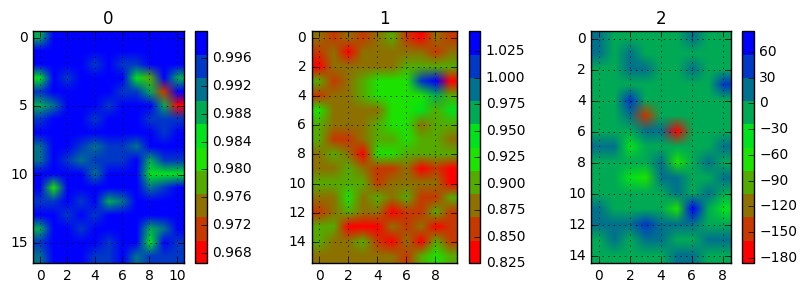

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):
    mRs = ScanData(19, 13, i+2)
    ax = axs[i]
    im = ax.imshow(mRs, cmap=cm); # origin='lower', interpolation='nearest', 'bilinear', 'bicubic'
    ax.set_title(i)
    ax.grid(True)
    fig.colorbar(im, ax=ax)
